In [1]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [4]:
# only get data analyst jobs in India
df_DA_india = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop Nan Values from the salary_year_avg column
df_DA_india = df_DA_india.dropna(subset=['salary_year_avg'])

In [6]:
df_DA_india = df_DA_india.explode('job_skills')

df_DA_india[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel
...,...,...
777313,111202.0,looker
777313,111202.0,powerpoint
784033,111175.0,power bi
784033,111175.0,tableau


In [13]:
df_DA_india_group = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_india_top_pay = df_DA_india_group.sort_values(by='median', ascending=False).head(10)

df_DA_india_skills = df_DA_india_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

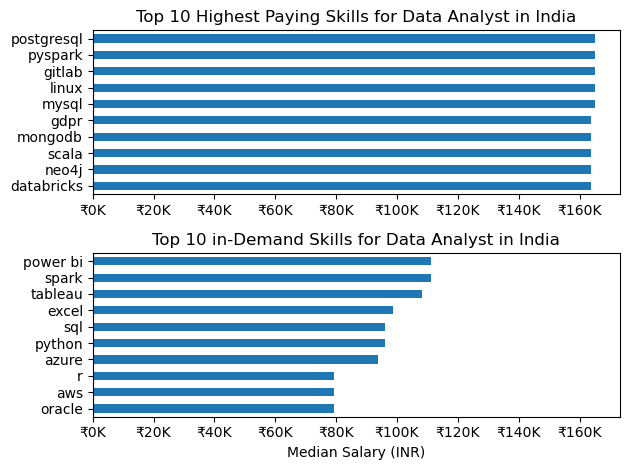

In [45]:
fig, ax = plt.subplots(2,1)

df_DA_india_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paying Skills for Data Analyst in India')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int(x/1000)}K'))

df_DA_india_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 in-Demand Skills for Data Analyst in India')
ax[1].set_xlabel('Median Salary (INR)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int(x/1000)}K'))

plt.tight_layout()
plt.show()
